In [1]:
# import libraries
%matplotlib inline
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML alogorithm
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder


from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


In [12]:
pwd

'/home/papageno/Nutstore/1_ComputerArt/Kaggle/Digit Recognizer'

In [2]:
### 训练
dataSet0 = pd.read_csv('train.csv')
dataSet = dataSet0.copy()

In [13]:
dataSet.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataSet['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [15]:
yLabels = dataSet['label'].values
Xdata = dataSet.drop(['label'], axis=1).values
Xdata.shape

(42000, 784)

In [15]:
import matplotlib

iloc = 5200
some_digit = Xdata[iloc]
some_digit_image = some_digit.reshape(28,28)

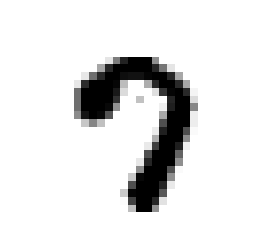

7

In [16]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

yLabels[iloc]

In [16]:
# 420k*0.8 = 336k
X_train, X_test, y_train, y_test = Xdata[:33600], Xdata[33600:], yLabels[:33600], yLabels[33600:]

In [7]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier


In [45]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

/home/mxue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [105]:
rnd_clf=RandomForestClassifier(n_estimators=4500, max_leaf_nodes=1500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=1500,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [13]:
# on the test et
ypred = knn_clf.predict(X_test)
(ypred==y_test).sum()/len(y_test)
# knn_clf n_neig=4: 

0.9725

In [74]:
0.9521428571428572,0.9582142857142857

0.8616666666666667

In [15]:
### 测试validation
testSet0 = pd.read_csv('test.csv')
testSet = testSet0.copy()
test_data = testSet.values
test_data.shape

(28000, 784)

In [17]:
# test data
y_test_predict = knn_clf.predict(test_data)

ImageId = list(range(len(y_test_predict)+1))[1:]
result = pd.DataFrame({"ImageId":ImageId, 'Label':y_test_predict})
result.to_csv("DigitRecog_knn0.csv",index=0)

### Training DNN

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

/home/papageno/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [7]:
#
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, scope="outputs", activation_fn=None)

In [8]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [9]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [10]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [11]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [12]:
n_epochs = 400
batch_size = 100

m, n = X_train.shape

In [13]:
cd ./

/home/papageno/Nutstore/1_ComputerArt/Kaggle/Digit Recognizer


In [17]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(m//batch_size):
            X_batch, y_batch = X_train[iteration*batch_size:(iteration+1)*batch_size] \
                    , y_train[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.13 Test accuracy: 0.11333334
1 Train accuracy: 0.13 Test accuracy: 0.11333334
2 Train accuracy: 0.13 Test accuracy: 0.11333334
3 Train accuracy: 0.13 Test accuracy: 0.11333334
4 Train accuracy: 0.13 Test accuracy: 0.11333334
5 Train accuracy: 0.13 Test accuracy: 0.11333334
6 Train accuracy: 0.13 Test accuracy: 0.11333334
7 Train accuracy: 0.13 Test accuracy: 0.11333334
8 Train accuracy: 0.13 Test accuracy: 0.11333334
9 Train accuracy: 0.13 Test accuracy: 0.11333334
10 Train accuracy: 0.13 Test accuracy: 0.11333334
11 Train accuracy: 0.13 Test accuracy: 0.11333334
12 Train accuracy: 0.13 Test accuracy: 0.11333334
13 Train accuracy: 0.13 Test accuracy: 0.11333334
14 Train accuracy: 0.13 Test accuracy: 0.11333334
15 Train accuracy: 0.13 Test accuracy: 0.11333334
16 Train accuracy: 0.13 Test accuracy: 0.11333334
17 Train accuracy: 0.13 Test accuracy: 0.11333334
18 Train accuracy: 0.13 Test accuracy: 0.11333334
19 Train accuracy: 0.13 Test accuracy: 0.11333334
20 Train a

KeyboardInterrupt: 